# Effects of Loan Characteristics on Loan Amount and Borrower's APR

## by Adeyemi Inioluwa



## Investigation Overview

In this project, I wanted to investigate the maximum loan amount to be given to a borrower and the features responsible for predicting the borrower's Annual Percentage Rate (APR) for the loan

## Dataset Overview

The dataset contains a peer to peer loan information consisting of approximately 113,937 loans with 81 variables on each loan. The features include;  loan original amount, borrowers annual percentage rate (APR), borrower stated monthly income, loan origination date, home ownership, employment status, income range, debt to income ratio etc.

In [40]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [41]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('loan.csv')

In [42]:
# Convert ProsperRating(Alpha), ProsperScore and IncomeRange, LoanOriginationMonth, and LoanOriginationYear  to ordinal categorial type

ordinal_var_dict = {'ProsperRating (Alpha)' : ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                   'ProsperScore' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                    'LoanOriginationMonth' : ['January', 'February', 'March', 'April', 'May','June',
                                              'July', 'August', 'September', 'October', 'November', 'December'],
                    'LoanOriginationYear' : [2009, 2010, 2011, 2012, 2013, 2014],
                   'IncomeRange' : ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999',
                                   '$1-24,999', '$0']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_loan[var] = df_loan[var].astype(ordered_var)
    

In [43]:
# Calculating the IQR to detect outliers

Q1 = df_loan['StatedMonthlyIncome'].quantile(0.25)
Q3 = df_loan['StatedMonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
LowerLimit = Q1 - 1.5 * IQR
UpperLimit = Q3 + 1.5 * IQR
print(LowerLimit)
print(UpperLimit)

-1515.25
11858.75


In [44]:
# Transforming the data frame by trimming the outliers

df_loan = df_loan[df_loan['StatedMonthlyIncome'] < UpperLimit]

In [45]:
# Number of rows after trimming of outliers

df_loan.shape

(71729, 23)

## Distribution of Loan Amount

The distribution is trimodal, and there are peaks at 5k, 10k, 15k, 20k. This indicates that these loans are in multiples of 5000. The smaller peaks at 7k, 8k, 9k, 11k, 12k, 13k, show that majority of the loans are in multiples of 1000

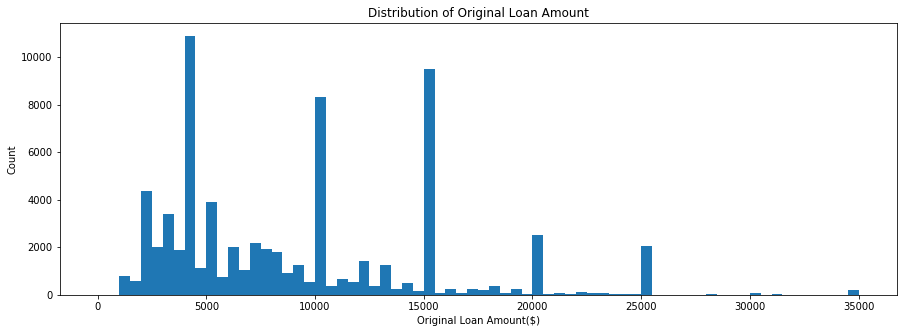

In [46]:
binsize = 500
bins = np.arange(0, df_loan['LoanOriginalAmount'].max() + binsize, binsize)
plt.figure(figsize = [15, 5])
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Original Loan Amount($)')
plt.ylabel('Count')
plt.title('Distribution of Original Loan Amount');

## Distribution of Borrower's APR

The distribution looks multimodal,with a very sharp peak between 0.36 and 0.37, there are peaks also at 0.1, and 0.2.

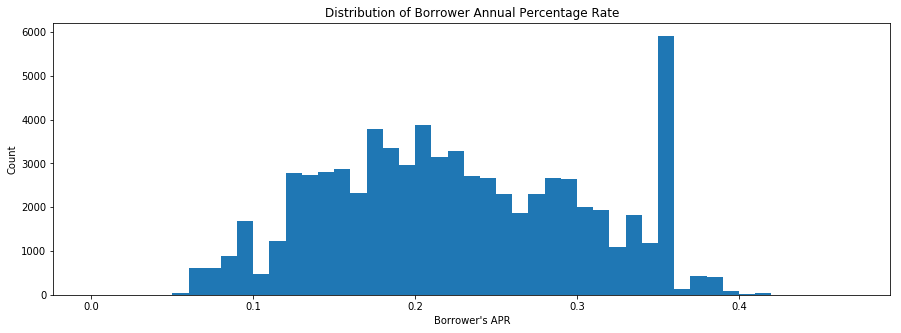

In [47]:
# Plotting a histogram of Borrower APR variabe using a standard scale

bins = np.arange(0, df_loan['BorrowerAPR'].max() + 0.05, 0.01)
plt.figure(figsize = [15, 5])
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = bins)
plt.xlabel("Borrower's APR")
plt.ylabel('Count')
plt.title('Distribution of Borrower Annual Percentage Rate');

## Distribution of Borrower's Monthly Income

The plot shows a long tail distribution, where majority of borrowers earn lower stated monthly income. After removing outliers, there was a sharp peak at 4000 dollars, and the peak at 0, represents the unemployed

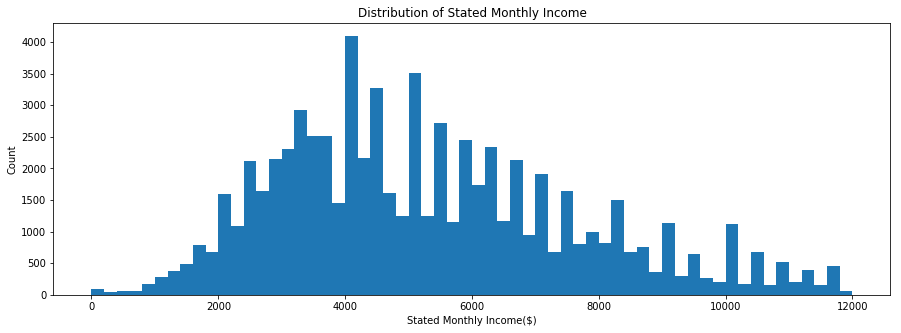

In [48]:
# Plotting a histogram of the trimmed Stated monthly income variabe using a standardscale

binsize = 200
bins = np.arange(0, df_loan['StatedMonthlyIncome'].max() + binsize, binsize)
plt.figure(figsize = [15, 5])
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Stated Monthly Income($)')
plt.ylabel('Count')
plt.title('Distribution of Stated Monthly Income');

## Distribution of Monthly Loan Payment

The plot shows a unimodal,right skewed distribution, where majority of the monthly loan payments are below 500 dollars. A large number of borrowers make their monthly loan payment at approximately 200 dollars

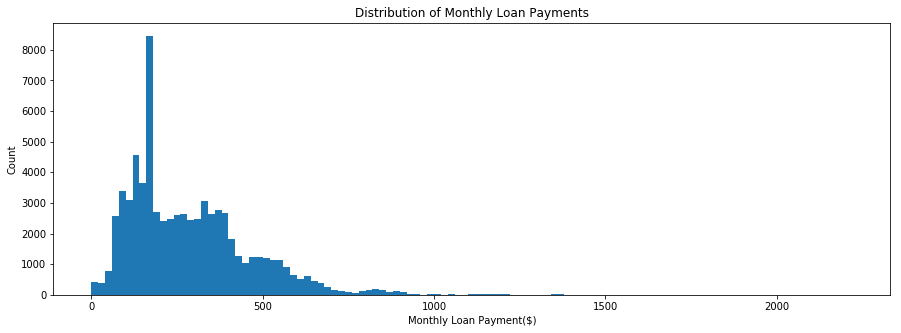

In [49]:
# Plotting histogram of MonthlyLoanPayment variabe using a standard scale

binsize = 20
bins = np.arange(0, df_loan['MonthlyLoanPayment'].max() + binsize, binsize)

plt.figure(figsize = [15, 5])
plt.hist(data = df_loan, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Monthly Loan Payment($)')
plt.ylabel('Count')
plt.title('Distribution of Monthly Loan Payments');

## Borrower's APR vs Loan Amount

This plot shows that as the loan amount increases the APR decreases. Generally there is a negative correlation between the Borrower's APR and Loan Original amount

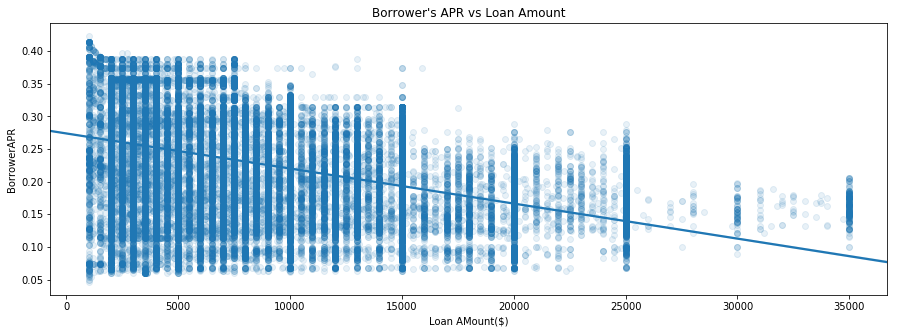

In [50]:
# Using seaborn's reglot

plt.figure(figsize = [15, 5])
sb.regplot(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws = {'alpha' : 0.1})
plt.xlabel('Loan AMount($)')
plt.ylabel('BorrowerAPR')
plt.title("Borrower's APR vs Loan Amount");

## Loan Amount by Borrower's Monthly Income

This plot shows a very strong positive correlation between loan amount and monthly income, which makes sense because borrowers with higher monthly income can get access to more loan amounts

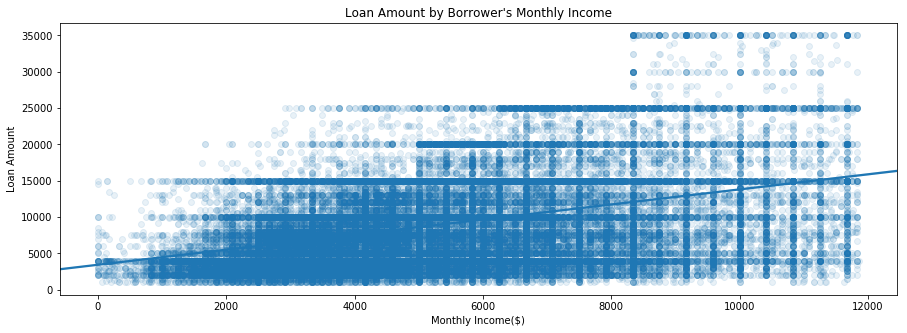

In [51]:
# Using seaborn's reglot

plt.figure(figsize = [15, 5])
sb.regplot(data = df_loan, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', scatter_kws = {'alpha' : 0.1})
plt.xlabel('Monthly Income($)')
plt.ylabel('Loan Amount')
plt.title("Loan Amount by Borrower's Monthly Income");

## Loan Amount across Loan term and Monthly payment

This plot shows a strong positive correlation between loan term and scheduled monthly payment, indicating that the more the loan amount the higher the monthly payment. This means that the monthly payment is dependent on the loan amount. The categorical variable loan term, has an effect on the relationship. So we observe that loan terms with the length of 36 and 60 months, have the highest loan amount.

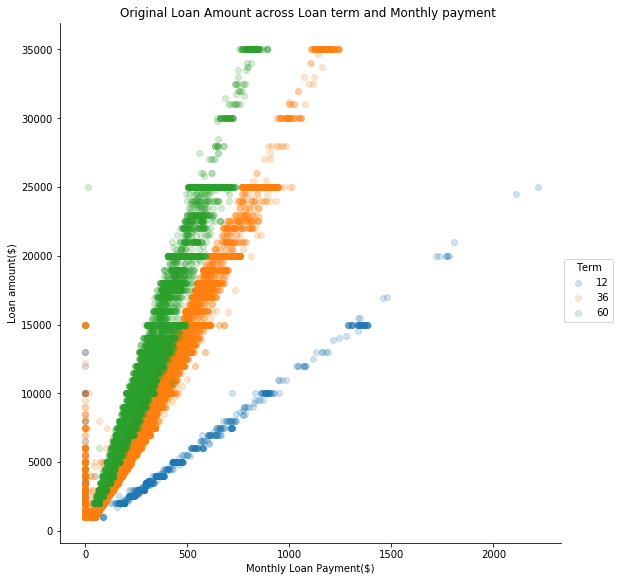

In [25]:
# PLotting the term effect on the relationship between loan amount and monthly payment

g = sb.FacetGrid(data = df_loan, hue = 'Term', size = 8)
g.map(plt.scatter, 'MonthlyLoanPayment', 'LoanOriginalAmount', alpha = 0.2)
plt.xlabel('Monthly Loan Payment($)')
plt.ylabel('Loan amount($)')
plt.title('Original Loan Amount across Loan term and Monthly payment ')
g.add_legend();

## Loan Amount by Prosper Risk Score

The plot shows that the best prosper risk score has the highest loan amount, this indicates that low risk borrowers have a higher chance of getting loans. Generally as the loan amount increases the prosper risk score reduces.

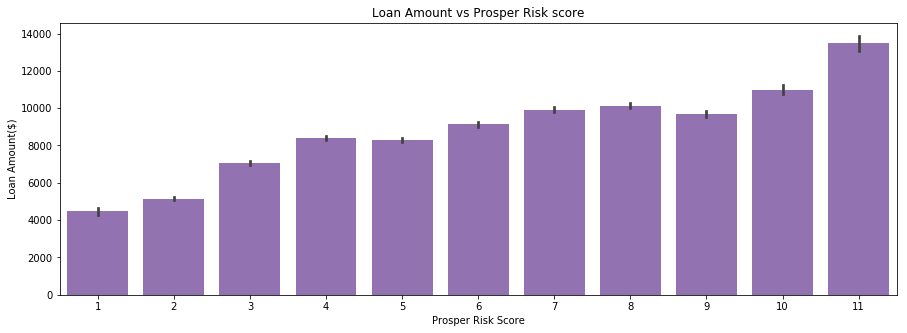

In [53]:
# Plotting the relationship between Loan original amount and prosper score

plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[4]
sb.barplot(data = df_loan, x = 'ProsperScore', y = 'LoanOriginalAmount', color = base_color)
plt.xlabel('Prosper Risk Score')
plt.ylabel('Loan Amount($)')
plt.title('Loan Amount vs Prosper Risk score');

## Loan Amount across Prosper Risk Score & Home Ownership

This plot shows that borrowers that are Home owners with a good posper risk scores will have access to higher loan amounts

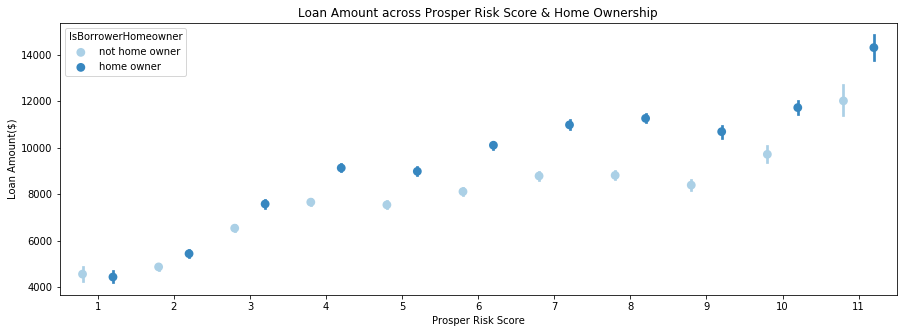

In [54]:
# Potting IsBorrowerHomeowner effect on the relationship laon amount and prosper score using a pointplot

fig = plt.figure(figsize = [15, 5])
ax = sb.pointplot(data = df_loan, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
                 palette ='Blues', linestyles= '', dodge = 0.4)

plt.xlabel('Prosper Risk Score')
plt.ylabel('Loan Amount($)')
plt.title('Loan Amount across Prosper Risk Score & Home Ownership')
ax.set_yticklabels([], minor = True);

## Borrower's APR vs Prosper Rating

This plot shows that borrowers with the best prosper ratings have the lowest APR, and they have the highest amount of stated monthly income, as well as their loan original amount. This means that prosper rating has a strong effect on Brrower's APR.

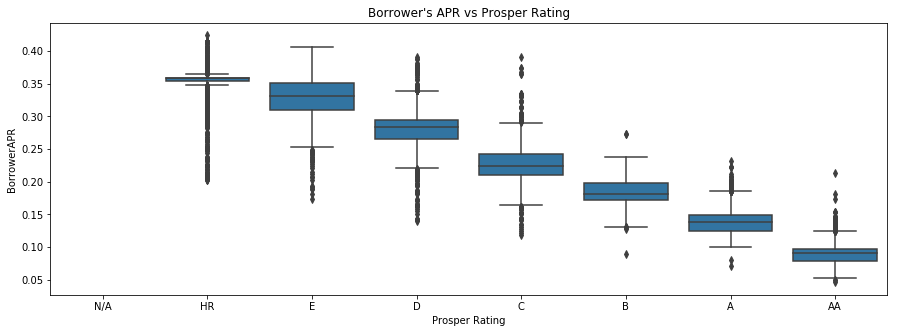

In [55]:
# Plotting using box plot

plt.figure(figsize = [15, 5])
def_col = sb.color_palette()[0]
sb.boxplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', color = def_col)
plt.xlabel('Prosper Rating')
plt.ylabel('BorrowerAPR')
plt.title("Borrower's APR vs Prosper Rating");

## Borrower's APR vs Prosper Risk score

This plot shows that borrowers with the least/bad prosper risk scores have the highest APR. 

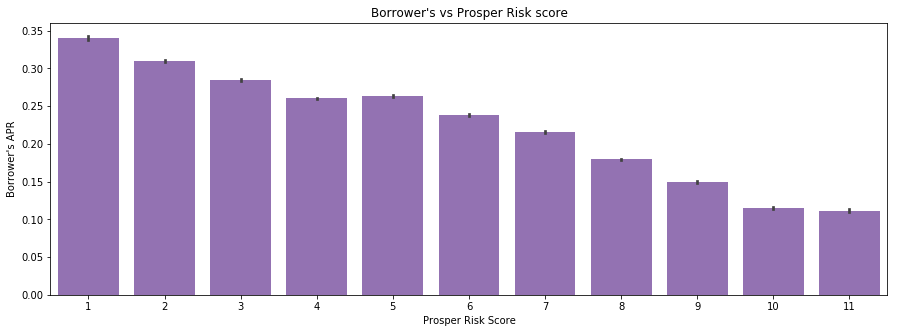

In [58]:
# Plotting the relationship between Borrower APR and prosper score

plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[4]
sb.barplot(data = df_loan, x = 'ProsperScore', y = 'BorrowerAPR', color = base_color)
plt.xlabel('Prosper Risk Score')
plt.ylabel("Borrower's APR")
plt.title("Borrower's vs Prosper Risk score");

## Borrower's APR across Prosper Ratings & Term

The plot shows that the borrower's APR decreases with an increase in loan term for borrowers with ratings of HR through to C, but for ratings from B to AA the APR increases with the increase in loan term.

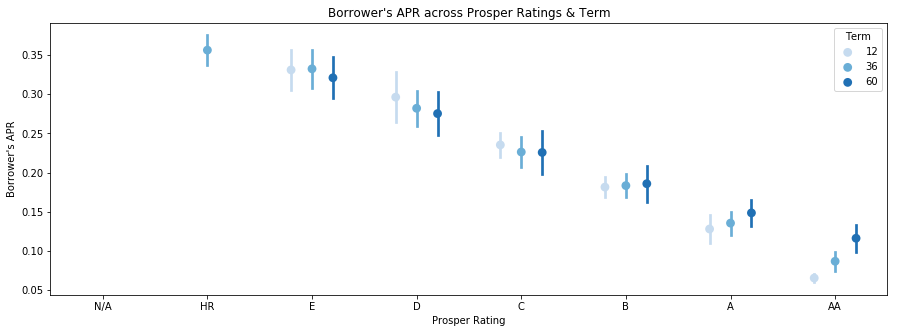

In [60]:
# Plotting term effect on the relationship between APR and ratings using a pointplot

fig = plt.figure(figsize = [15, 5])
ax = sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
                 palette ='Blues', linestyles= '', dodge = 0.4, ci = 'sd')

plt.xlabel('Prosper Rating')
plt.ylabel("Borrower's APR")
plt.title("Borrower's APR across Prosper Ratings & Term")
ax.set_yticklabels([], minor = True);

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_exploration.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_exploration.ipynb to slides
[NbConvertApp] Writing 989695 bytes to Part_II_slide_deck_exploration.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_exploration.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: 